# Q3. 코로나 19 현황과 인구 수 데이터를 분석 시각화한 결과를 Django 웹 앱으로 시각화 결과를 배포하시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# 1. 데이터 적재 및 선별
df = pd.read_csv(
    'https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',
    parse_dates = ['Date'])
print(f"{len(df)} 행 x {len(df.columns)} 열")

countries = ['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']
df = df[ df['Country'].isin(countries)]
print(f"{len(df)} 행 x {len(df.columns)} 열")
df.sample(3)

135828 행 x 5 열
3465 행 x 5 열


,Date,Country,Confirmed,Recovered,Deaths
43596,2021-10-13,France,7164924,0,118080
45780,2020-03-04,Germany,262,16,0
64075,2020-12-06,"Korea, South",38161,29301,549


In [3]:
# 2. 합계 열 생성
df['Cases'] = df[['Confirmed']].sum(axis='columns')
df.sample(3)

,Date,Country,Confirmed,Recovered,Deaths,Cases
129272,2021-01-30,United Kingdom,3806997,9584,105777,3806997
126189,2020-03-25,US,68841,361,1366,68841
129370,2021-05-08,United Kingdom,4448808,15011,127863,4448808


In [4]:
# 3. 데이터 구조 재편
df.sample(3)

,Date,Country,Confirmed,Recovered,Deaths,Cases
126701,2021-08-19,US,37479349,0,626348,37479349
129517,2021-10-02,United Kingdom,7908091,0,137295,7908091
64215,2021-04-25,"Korea, South",119387,108850,1817,119387


In [5]:
covid = pd.pivot_table(data=df, index='Date', columns='Country', values='Cases')
covid

Country,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2021-12-10,8265076,6496142,510583,49833771,10780610
2021-12-11,8318995,6528894,517271,49884847,10833033
2021-12-12,8362843,6546010,523088,49921799,10881189


In [6]:
covid.sample(3)

Country,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2021-08-19,6637417,3854529,232859,37479349,6422515
2021-08-26,6777592,3923250,245158,38576365,6659916
2021-11-13,7377483,5037039,395460,47055794,9572351


In [7]:
covid.columns

Index(['France', 'Germany', 'Korea, South', 'US', 'United Kingdom'], dtype='object', name='Country')

In [8]:
covid.columns = covid.columns.to_list()
covid.sample(3)

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-08-15,254974,224488,15318,5366170,319232
2021-11-09,7334332,4857463,385831,46717710,9412185
2020-08-29,312665,242835,19699,5957980,334916


In [9]:
# 4. 인구 대비 건수 계산 (건/인구수)
pop = pd.read_csv(
    './population_by_country_2020.csv', usecols=["Country (or dependency)",
                                                "Population (2020)"])
pop.head()

,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [10]:
pop.rename(columns = {'Country (or dependency)': 'Country', 'Population (2020)':'Population'}, inplace = True)
pop.head()

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


In [11]:
countries

['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']

In [12]:
pop = pop[
    pop['Country'].isin(countries)
    |
    pop['Country'].isin(['United States', 'South Korea'])
]
pop

,Country,Population
2,United States,331341050
18,Germany,83830972
20,United Kingdom,67948282
21,France,65298930
27,South Korea,51276977


In [13]:
pop = pop.replace({'United States' : 'US', 'South Korea' : 'Korea, South'})

pop.set_index(['Country'], inplace=True)
pop

,Population
Country,
US,331341050
Germany,83830972
United Kingdom,67948282
France,65298930
"Korea, South",51276977


In [14]:
pop = pop.to_dict()
pop

{'Population': {'US': 331341050,
  'Germany': 83830972,
  'United Kingdom': 67948282,
  'France': 65298930,
  'Korea, South': 51276977}}

In [15]:
populations = pop['Population']
populations

{'US': 331341050,
 'Germany': 83830972,
 'United Kingdom': 67948282,
 'France': 65298930,
 'Korea, South': 51276977}

In [16]:
percapita = covid.copy()
percapita

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-01-22,0,0,1,1,0
2020-01-23,0,0,1,1,0
2020-01-24,2,0,2,2,0
2020-01-25,3,0,2,2,0
2020-01-26,3,0,3,5,0
...,...,...,...,...,...
2021-12-10,8265076,6496142,510583,49833771,10780610
2021-12-11,8318995,6528894,517271,49884847,10833033
2021-12-12,8362843,6546010,523088,49921799,10881189


In [17]:
for country in percapita.columns.to_list():
    percapita[country] = (percapita[country] / populations[country] * 100).round(2)
    
percapita.sample(3)

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2021-11-22,11.52,6.50,0.82,14.45,14.63
2020-10-01,0.95,0.35,0.05,2.20,0.68
2021-10-22,11.05,5.32,0.68,13.71,12.85


In [18]:
# 5. 코로나 19 현황 시각화 (건수 기준)
covid.sample(5).sort_values('Date')

,France,Germany,"Korea, South",US,United Kingdom
Date,,,,,
2020-02-01,6,8,12,8,2
2020-02-13,11,16,28,14,17
2021-02-07,3396055,2291673,81185,27141041,3957181
2021-06-17,5811592,3727668,150238,33587050,4616628
2021-12-03,7927361,6134492,467907,48991142,10438381


In [19]:
covid.max()

France             8438360
Germany            6633666
Korea, South        536495
US                50233338
United Kingdom    10995311
dtype: int64

In [20]:
covid.max().max()

50233338

In [21]:
countries

['Korea, South', 'Germany', 'United Kingdom', 'US', 'France']

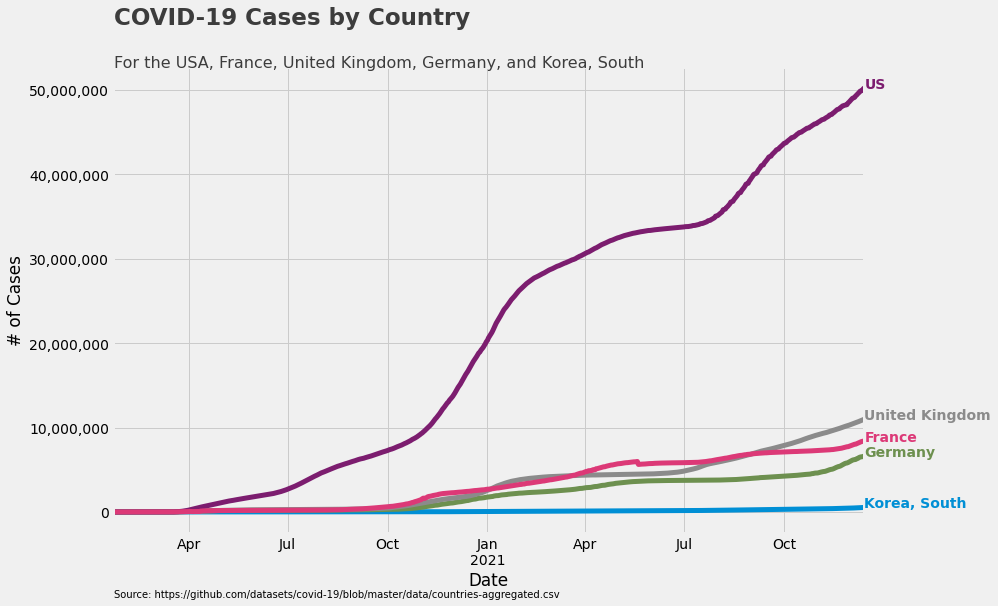

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

colors = {'Korea, South':'#008fd5',
         'France':'#DC3977',
         'Germany':'#6d904f',
         'US':'#7C1D6F',
         'United Kingdom':'#8b8b8b'}
plt.style.use('fivethirtyeight')

ax = plt.gca()
for country in countries:
    covid[country].plot(
        figsize=(12,8),
        color=colors[country],
        linewidth=5,
        legend=False,
        ax=ax,
    )
    
ax.yaxis.set_major_formatter(
    ticker.StrMethodFormatter('{x:,.0f}')
)

ax.set_xlabel('Date')
ax.set_ylabel('# of Cases')

for country in list(colors.keys()):
    ax.text(
        x=covid.index[-1],
        y=covid[country].max(),
        color=colors[country],
        s=country,
        weight='bold')

main_title = "COVID-19 Cases by Country"
ax.text(
    x=covid.index[1],
    y=covid.max().max()*1.15,
    s=main_title,
    fontsize=23,
    weight='bold',
    alpha=.75
)

sub_title = "For the USA, France, United Kingdom, Germany, and Korea, South"
ax.text(
    x = covid.index[1],
    y = covid.max().max()*1.05,
    s = sub_title,
    fontsize = 16,
    alpha = .75)

data_source = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'
ax.text(
    x = percapita.index[1],
    y = -int(covid.max().max())/5,
    s = data_source,
    fontsize = 10)

plt.show()

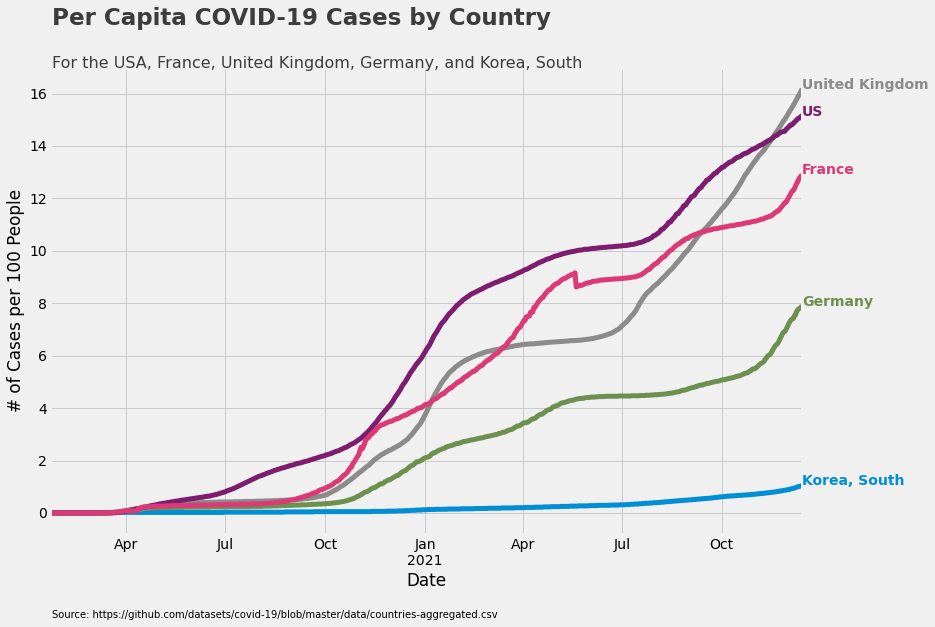

In [23]:
# 6. 코로나 19 현황 시각화 (비율 기준)
ax = plt.gca()
for country in countries:
    percapita[country].plot(
        figsize=(12,8),
        color=colors[country],
        linewidth=5,
        legend=False,
        ax=ax,
    )
    
ax.set_xlabel('Date')
ax.set_ylabel('# of Cases per 100 People')

for country in list(colors.keys()):
    ax.text(
        x=percapita.index[-1],
        y=percapita[country].max(),
        color=colors[country],
        s=country,
        weight='bold')
    
ax.text(
    x=percapita.index[1],
    y=percapita.max().max()*1.15,
    s="Per Capita COVID-19 Cases by Country",
    fontsize=23,
    weight='bold',
    alpha=.75)

ax.text(
    x = percapita.index[1],
    y = percapita.max().max()*1.05,
    s = "For the USA, France, United Kingdom, Germany, and Korea, South",
    fontsize = 16,
    alpha = .75)

ax.text(
    x = percapita.index[1],
    y = -int(percapita.max().max())/4,
    s = 'Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv',
    fontsize = 10)

plt.show()

In [24]:
# 7. subplot 시각화
def chart(df, is_rate=False):
    ax = plt.gca()
    for country in countries:
        df[country].plot(
            figsize=(12,8),
            color=colors[country],
            linewidth=5,
            legend=False,
            ax=ax,
        )
        
    if not is_rate:
        ax.yaxis.set_major_formatter(
            ticker.StrMethodFormatter('x:.,0f'))
        
    ax.set_xlabel('Date')
    if is_rate:
        ax.set_ylabel('# of Cases per 100 people')
        title = "Per Capita COVID-19 Cases by Country"
    else:
        ax.set_ylabel('# of Cases')
        title = "COVID-19 Cases by Country"
    
    for country in list(colors.keys()):
        ax.text(
            x=df.index[-1],
            y=df[country].max(),
            color=colors[country],
            s=country,
            weight='bold')
        
    ax.text(
        x=df.index[1],
        y=df.max().max()*1.15,
        s=title,
        fontsize=23,
        weight='bold',
        alpha=.75
    )

    ax.text(
        x = df.index[1],
        y = df.max().max()*1.06,
        s = "For the USA, France, United Kingdom, Germany, and Korea, South",
        fontsize = 16,
        alpha = .75)
    
    return ax

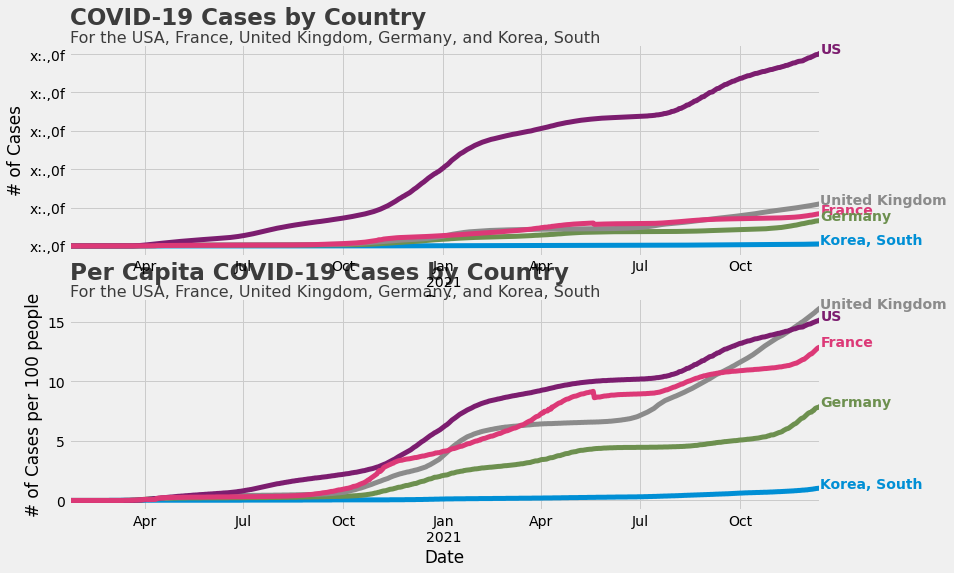

In [25]:
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 35))
gs = gridspec.GridSpec(nrows=2, ncols=1)

ax0 = plt.subplot(gs[0])
chart(covid)

ax2 = plt.subplot(gs[1])
chart(percapita, is_rate=True)

plt.show()

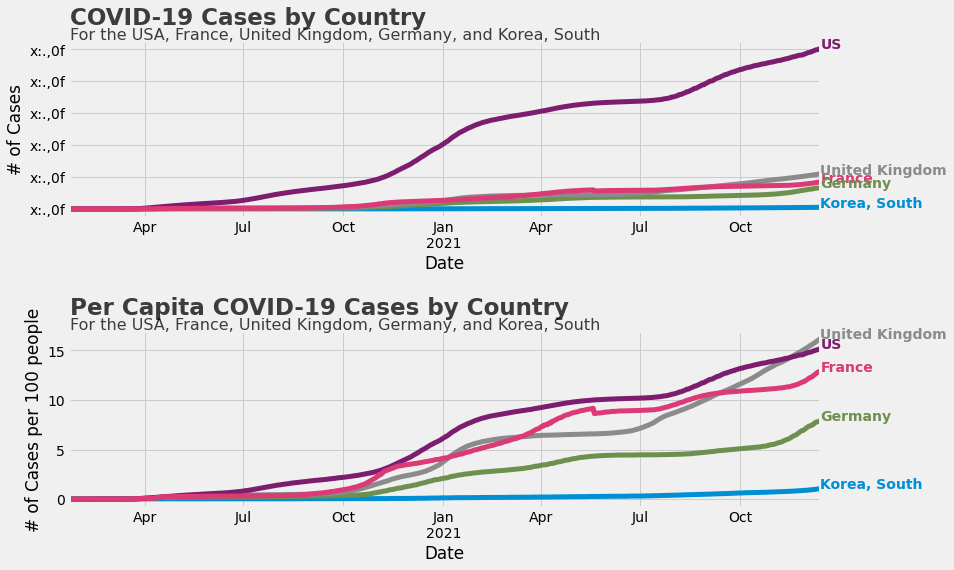

In [26]:
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 35))
gs = gridspec.GridSpec(nrows=3, ncols=1, height_ratios=[15, 5, 15])

ax0 = plt.subplot(gs[0])
chart(covid)

ax2 = plt.subplot(gs[2])
chart(percapita, is_rate=True)

plt.show()